<a href="https://colab.research.google.com/github/Nicotinamide/jupyter/blob/main/liner_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l  # installing d2l  ！！！根据提示重启机器

In [2]:
## 从零开始实现线性回归，包括数据流水线，模型，损失函数和最小批量随机梯度下降优化器
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
  """生成y=Xw+b+噪音"""
  X = torch.normal(0,1,(num_examples,len(w)))    ###torch.normal(mean, std, *, generator=None, out=None)  其中(num_examples,len(w))可能是用来确定矩阵形状的
  y = torch.matmul(X,w) + b   ### matmul没有强制规定矩阵维度大小，可以通过广播机制进行不同维度之间的矩阵计算，mm为矩阵相乘，且不能计算向量
  y += torch.normal(0,0.01,y.shape)
  return X,y.reshape((-1,1))   ###(-1,1)表示固定列数为1，行数自动计算
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [4]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.6522,  0.2349]) 
label: tensor([0.0866])


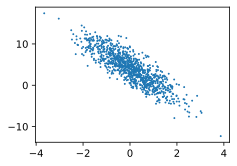

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);  ###之前报错原因：安装d2l后重启机器，更换matplotlib版本